# Лабораторна робота 2. Побудова лінійного бінарного класифікатора на основі оптимізації функціонала якості

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Weights: [ 0.01107404 -0.00147094 -0.01692474]


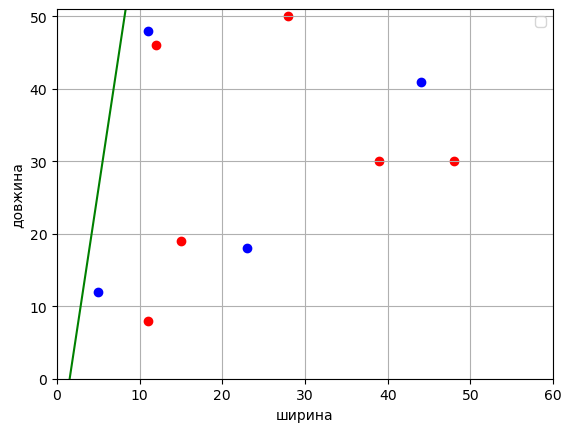

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

wb = openpyxl.load_workbook('data.xlsx')
ws = wb.active

# Читаємо дані з файлу Excel та конвертуємо їх у числовий формат
x_train_0 = np.array([float(ws.cell(row=i,column=1).value) for i in range(2, ws.max_row+1)])
x_train_1 = np.array([float(ws.cell(row=i,column=2).value) for i in range(2, ws.max_row+1)])
y_train = np.array([float(ws.cell(row=i,column=3).value) for i in range(2, ws.max_row+1)])

# Об'єднуємо дані у вхідні вектори
x_train = np.column_stack((x_train_0, x_train_1, np.ones_like(x_train_0)))

# Обчислення вагових коефіцієнтів
w = np.linalg.lstsq(x_train, y_train, rcond=None)[0]
print("Weights:", w)

# Формуємо координати для лінії розділення
line_x = np.arange(0, np.max(x_train[:, 0]) + 1)
line_y = -(w[0] * line_x + w[2]) / w[1]

# Розділяємо дані на класи
x_0 = x_train[y_train == 1]
x_1 = x_train[y_train == -1]

# Відображаємо графік
plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')
plt.xlim([0, 60])
plt.ylim([0, 51])
plt.ylabel("довжина")
plt.xlabel("ширина")
plt.grid(True)
plt.legend()
plt.show()


В даному випадку результат класифікації відрізняється від попередньго тим, що прама розташована не на початку координат, а зміщена по осі ширини вправо

## Відповіді на контрольні питання

1. Що таке відступ (margin) і яка його роль в побудові моделі класифікації?

Відступ (margin) - це відстань між границею розділення класів у моделі класифікації та найближчими до неї екземплярами даних. Великий відступ свідчить про стійкість моделі до нових даних та дозволяє зменшити ризик перенавчання. Максимізація відступу сприяє покращенню загальної ефективності моделі на тестових даних, тому бажаною метою є пошук моделі з найбільшим можливим відступом.

2. Яка роль функції втрат і чому не можна знайти коефіцієнти лінійного класифікатора шляхом безпосереднього розв'язаня задачі оптимізації через знаходження похідної? 

Функція втрат визначає, наскільки добре модель класифікації працює на навчальних даних шляхом порівняння прогнозованих значень з фактичними. Її роль полягає в тому, щоб оцінити, наскільки ефективно модель розділяє класи і як можна покращити цю ефективність.

Для знаходження оптимальних коефіцієнтів частіше використовують ітеративні методи оптимізації, такі як градієнтний спуск, які апроксимують оптимальні значення шляхом поступового оновлення параметрів моделі.

3. Чим приницпово розрізняється алгоритм, розглянутий у цій роботі від алгоритму, розглянутого у лаб. роб 1?

Відмінність полягає в методі знаходження оптимальних параметрів моделі: простий лінійний бінарний класифікатор використовує прямий аналітичний або ітеративний підхід, тоді як лінійний бінарний класифікатор на основі оптимізації функціонала якості оптимізує функціонал якості для знаходження оптимальних параметрів.

4. Вивести математичний вираз для оцінки вектора $\omega$?
   
$y_i (\omega ^T x_i + b)>= 1$

де $x_i$ - вектор ознак 

$i$-го прикладу даних

$y_i$ - мітка класу $i$-го прикладу даних

$b$ - зсув $(bias)$.